<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev96_gnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.6 - Kümeleme Algoritmaları: Gaussian Mixture Models (GMM)
## Ödev:
Bu ödevde, UC Irvine Machine Learning Repository'de bulunan kalp hastalığı veri setiyle çalışacaksınız.

Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

<code># Define the features and the outcome<br>
X = heartdisease_df.iloc[:, :13]<br>
y = heartdisease_df.iloc[:, 13]<br></code>

<code># Replace missing values (marked by ?) with a 0<br>
X = X.replace(to_replace='?', value=0)<br></code>

<code># Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis<br>
y = np.where(y > 0, 0, 1)<br></code>

Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman buna karşılık gelen hastanın kalp hastalığı olduğunu ve y'nin 0'a eşit olması durumunda, hastanın kalp hastalığı olmadığı anlaşılacaktır.

1) n_components = 2 olarak ayarlayarak kalp hastalığı verilerine GMM uygulayın. Çözümünüz için ARI ve siluet skorlarına bakın ve önceki derslerde k-means ve hiyerarşik kümeleme çözümleriyle karşılaştırın. Hangi algoritma daha iyi performans gösteriyor?

2) Scikit-learn ile GMM uygulanırken kullanılan parametrelerden biri de covariance_type'dir. Bu parametre, kullanılacak kovaryans parametrelerinin türünü belirler. Özellikle, belirtebileceğiniz dört tür vardır:

* **full**: Bu varsayılandır. Her bileşenin kendi genel kovaryans matrisi vardır.
* **tied**: Tüm bileşenler aynı genel kovaryans matrisini paylaşır.
* **diag**: Her bir bileşenin kendi çapraz kovaryans matrisi vardır.
* **spherical**: Her bir bileşenin kendine ait tek bir varyansı vardır.
Bunları deneyin. Hangisi ARI ve siluet skorları açısından daha iyi performans gösteriyor?

---
---
---
## Soru 1

In [1]:
# mounting the Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#from sklearn.model_selection import train_test_split
#from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets, metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
path = "/content/drive/My Drive/MertColab/odevler/Cleveland.data"
heart_disease = pd.read_csv(path, sep=",", names=columns)
del columns, path

In [4]:
heart_disease.head(3)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [5]:
# preprocess
x1 = heart_disease.iloc[:, :13]
y1 = heart_disease.iloc[:, 13]

x1 = x1.replace(to_replace="?", value=0)
x1 = x1.astype("float64")
y1 = np.where(y1>0, 1, 0)

scaler = StandardScaler()
x1_std = scaler.fit_transform(x1)

pca_model = PCA(n_components=2)
x1_pca = pca_model.fit_transform(x1_std)

In [6]:
print("Variance Ratios: {}".format(pca_model.explained_variance_ratio_))

Variance Ratios: [0.23630818 0.12281689]


In [7]:
# Gaussian mixture model
gmm_model = GaussianMixture(n_components=2, random_state=42)
y1_prediction = gmm_model.fit_predict(x1_std)

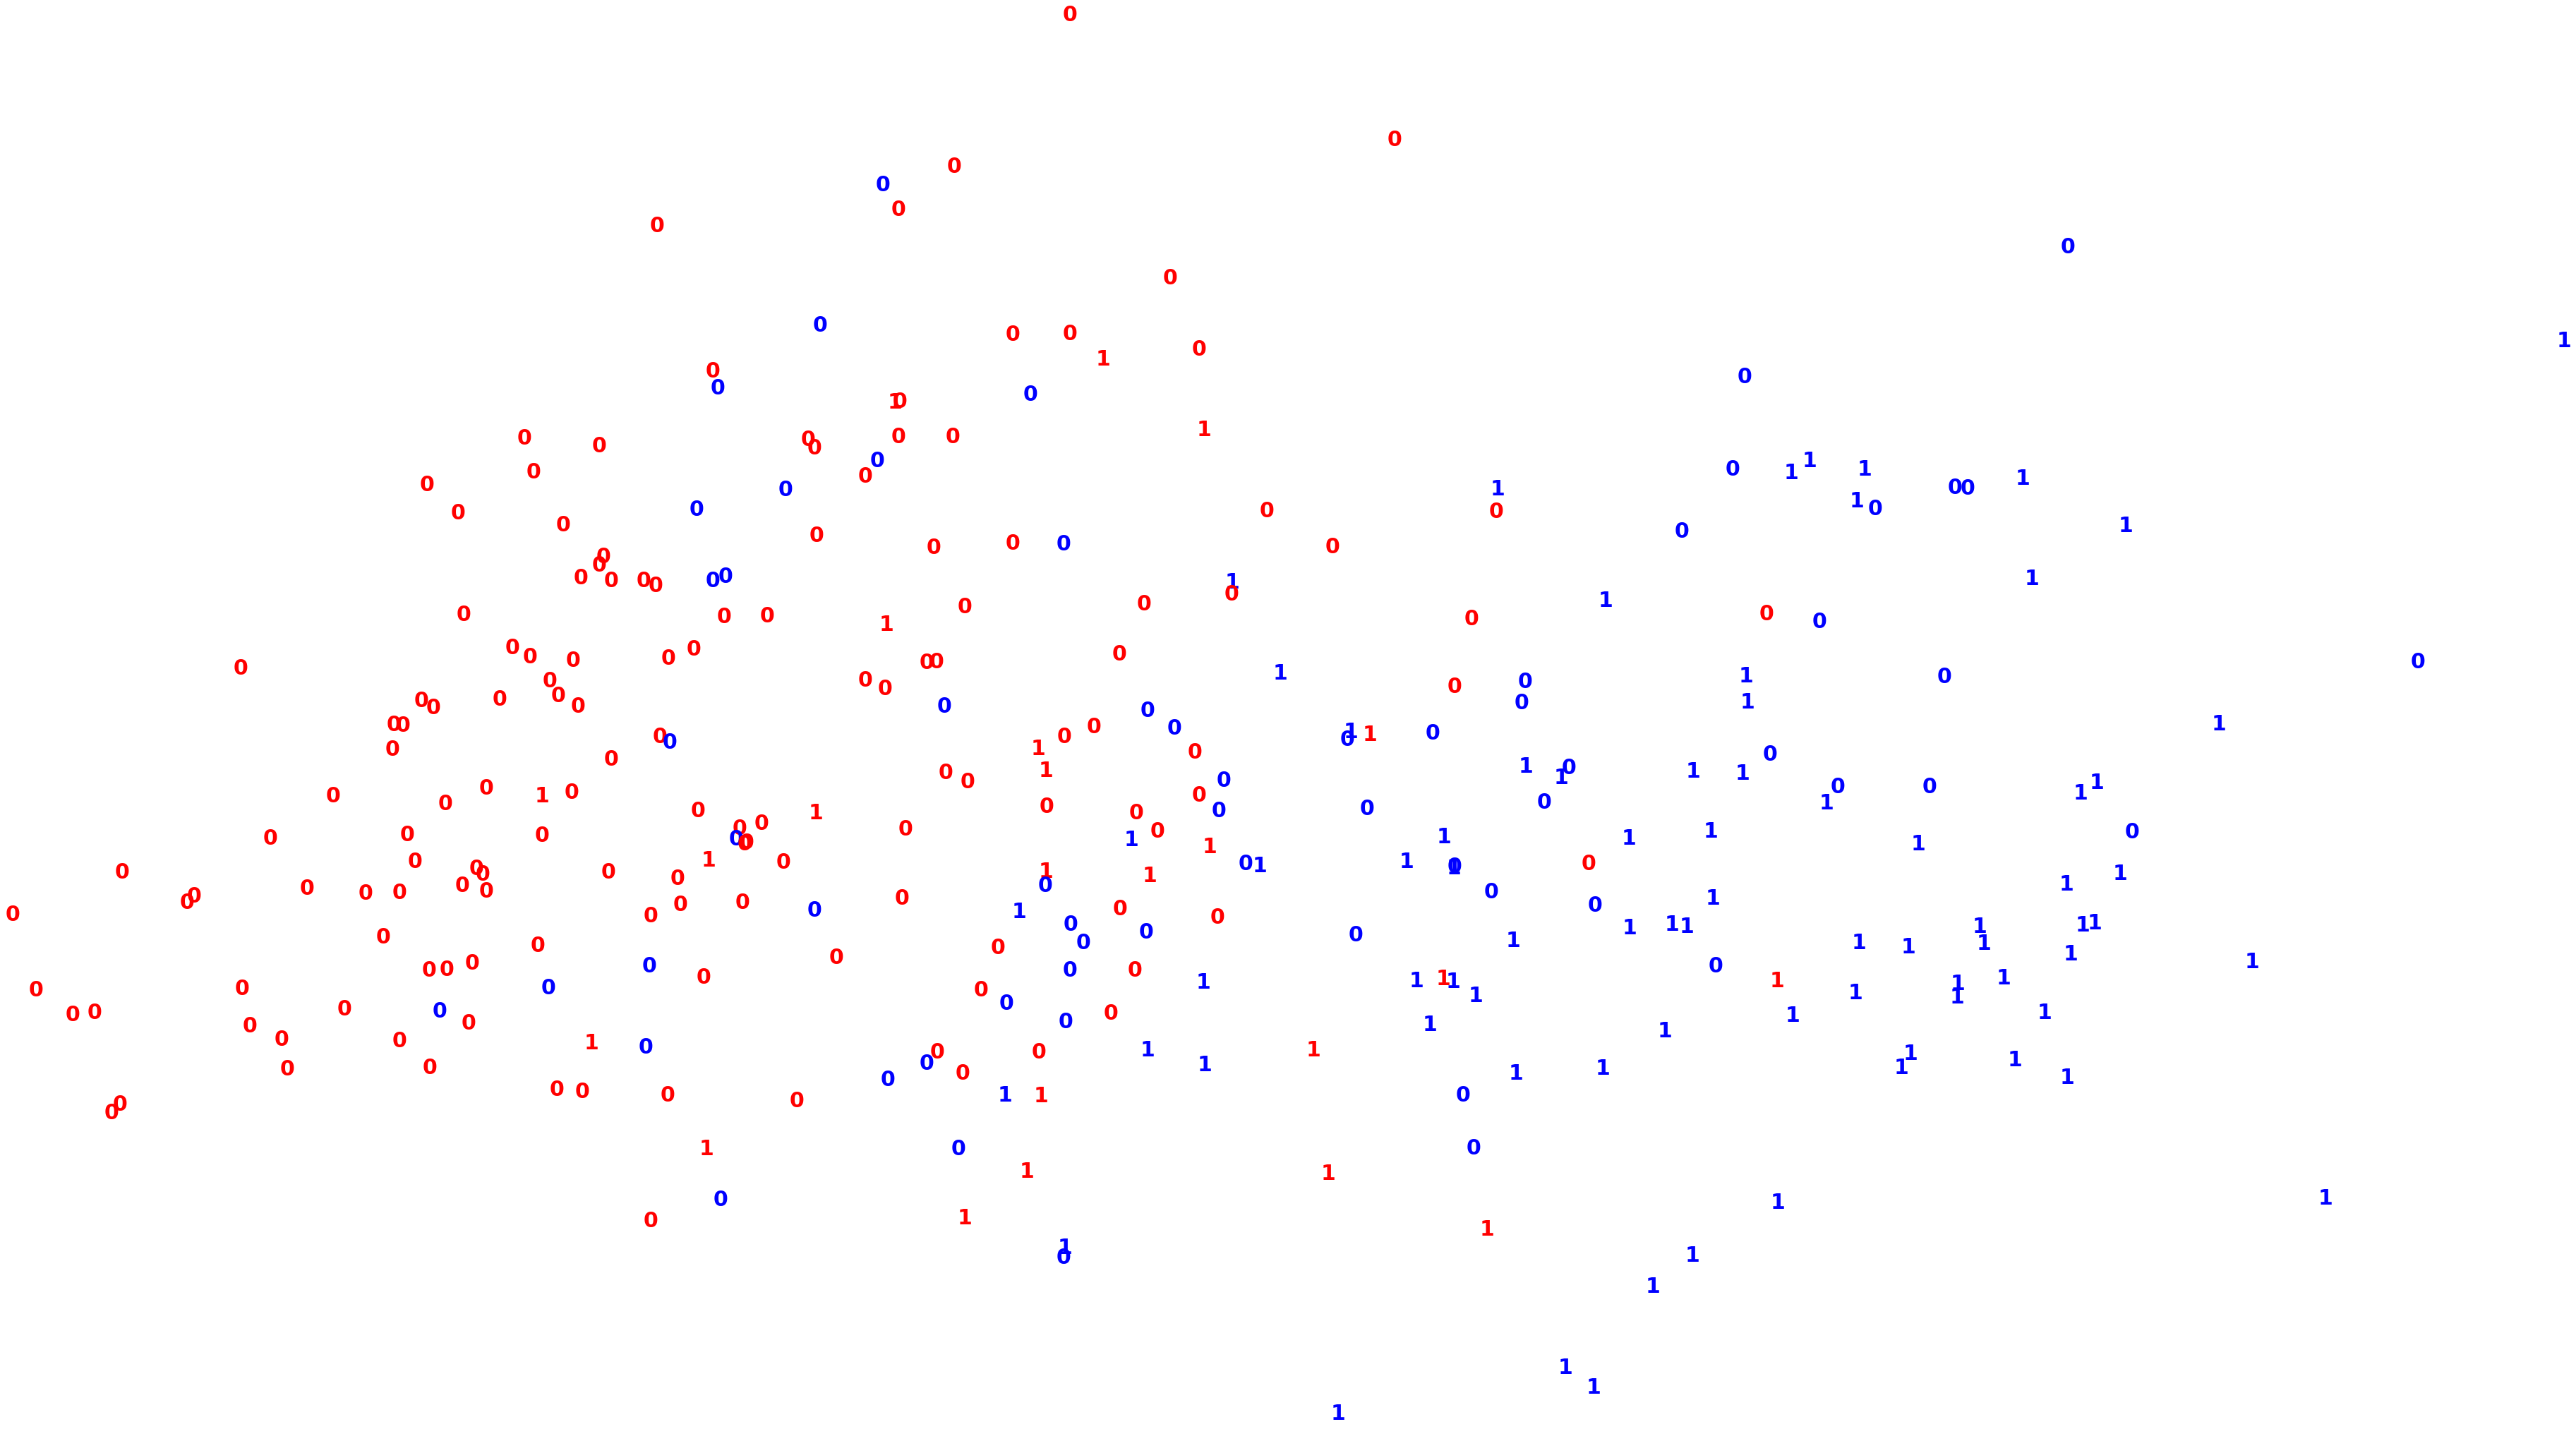

In [8]:
plt.figure(figsize=(8, 5))
colors = "rbg"
for i in range(x1_pca.shape[0]):
    plt.text(x=x1_pca[i, 0], y=x1_pca[i, 1], s=str(y1_prediction[i]), 
            color=colors[y1[i]], fontdict={"weight":"bold", "size":30})

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

In [9]:
silhouette = metrics.silhouette_score(x1_std, y1_prediction, random_state=42)
ari_value = metrics.adjusted_rand_score(y1, y1_prediction)
print(f"Silhouette score of GMM    : {silhouette:.3f}")
print(f"Adjusted Rand score of GMM : {ari_value:.3f}\n")

print("Remember that for 'k-means' model:")
print(f"Silhouette score    : 0.438")
print(f"Adjusted Rand score : 0.175")

print(f"\nFor 'Hierarchical Agglomerative Clustering' model:")
print(f"Silhouette score    : 0.139")
print(f"Adjusted Rand score : 0.146")

Silhouette score of GMM    : 0.136
Adjusted Rand score of GMM : 0.184

Remember that for 'k-means' model:
Silhouette score    : 0.438
Adjusted Rand score : 0.175

For 'Hierarchical Agglomerative Clustering' model:
Silhouette score    : 0.139
Adjusted Rand score : 0.146


**Yorum:** En yüksek Adjusted Rand indeksi, Gauss Karışım Modeli'nde gözlemlenmiştir.


***
## Soru 2:

In [19]:
# silhouette & adjusted rand score of the model with various covariance types
df_scores = pd.DataFrame(columns=["Covariance Type", 
                                  "Silhouette Score", 
                                  "Adj. Rand Score"])
pd.options.display.float_format = '{:.4f}'.format

covariance_types = ["full", "tied", "diag", "spherical"]
for cov in covariance_types:
    gmm_model = GaussianMixture(n_components=2, 
                                random_state=42, 
                                covariance_type=cov)
    y1_prediction = gmm_model.fit_predict(x1_std)
    silhouette = metrics.silhouette_score(x1_std, y1_prediction, 
                                          random_state=42)
    ari_value = metrics.adjusted_rand_score(y1, y1_prediction)
    df_scores = df_scores.append({"Covariance Type":cov, 
                                  "Silhouette Score":silhouette, 
                                  "Adj. Rand Score":ari_value}, 
                                 ignore_index=True)
df_scores

,Covariance Type,Silhouette Score,Adj. Rand Score
0,full,0.1363,0.1839
1,tied,0.1363,0.1839
2,diag,0.1363,0.1839
3,spherical,0.1247,0.2077


### Yorumlar:
Adjusted Rand indeksi, kovaryans parametresinin "spherical" olduğu modelde maksimum değerdedir. Bu parametrede, her bir bileşenin kendine ait tek bir varyansı vardır.

\## Bu parametreleri biraz açıklayabilir misiniz?